In [1]:
# %% [bootstrap deps] —— 仅补齐最低依赖（不会动核心包）
import sys, subprocess, importlib

REQ = {
    "joblib": "joblib==1.4.2",
    "yaml": "pyyaml==6.0.2",
    "pandas": "pandas>=2.0.0",
    "matplotlib": "matplotlib>=3.7.0",
}

def ensure(import_name: str, pip_spec: str):
    try:
        importlib.import_module(import_name)
        print(f"[ok] {import_name} already available")
        return
    except Exception:
        pass
    print(f"[setup] installing {pip_spec} ...")
    r = subprocess.run([sys.executable, "-m", "pip", "install", pip_spec, "-q", "--disable-pip-version-check", "--no-input"],
                       capture_output=True, text=True)
    if r.returncode != 0:
        print("\n".join((r.stderr or "").splitlines()[-10:]))
        raise RuntimeError(f"pip install failed: {pip_spec}")
    importlib.invalidate_caches()
    importlib.import_module(import_name)
    print(f"[ok] {import_name} ready")

for imp, spec in REQ.items():
    ensure(imp, spec)
print("[done] bootstrap complete.")

[ok] joblib already available
[ok] yaml already available
[ok] pandas already available
[ok] matplotlib already available
[done] bootstrap complete.


In [2]:
# %% [imports & paths]
from pathlib import Path
import json, warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PROJECT_ROOT = Path.cwd().resolve().parents[0] if Path.cwd().name == "notebooks" else Path.cwd()
CONF_PATH = PROJECT_ROOT / "conf" / "config.yaml"

# 输出目录（使用 config 中定义的路径；如缺省则回退到 outputs/*）
try:
    import yaml
    cfg = yaml.safe_load(CONF_PATH.read_text(encoding="utf-8"))
except Exception:
    cfg = {}

OUT_DIR  = PROJECT_ROOT / "outputs"
FIG_DIR  = Path(cfg.get("output", {}).get("figures", "outputs/figures"))
TAB_DIR  = Path(cfg.get("output", {}).get("tables",  "outputs/tables"))
FIG_DIR  = (PROJECT_ROOT / FIG_DIR).resolve()
TAB_DIR  = (PROJECT_ROOT / TAB_DIR).resolve()

MODEL   = "random_forest"     # 可以改为你想展示的模型
METHOD  = "isotonic"          # "raw" | "isotonic" | "sigmoid"
SUFFIX  = "" if METHOD == "raw" else f"_{METHOD}"

print("[paths]")
print("  PROJECT_ROOT:", PROJECT_ROOT)
print("  FIG_DIR     :", FIG_DIR)
print("  TAB_DIR     :", TAB_DIR)
print("  MODEL/METHOD:", MODEL, METHOD)

[paths]
  PROJECT_ROOT: /public/home/aojiang/海南医科大学/icu-lymphoma-ml-repro
  FIG_DIR     : /public/home/aojiang/海南医科大学/icu-lymphoma-ml-repro/outputs/figures
  TAB_DIR     : /public/home/aojiang/海南医科大学/icu-lymphoma-ml-repro/outputs/tables
  MODEL/METHOD: random_forest isotonic


In [3]:
# %% [helper: style]
def apply_mpl_style():
    plt.rcParams.update({
        "font.size": 12,
        "axes.titlesize": 16,
        "axes.labelsize": 13,
        "legend.fontsize": 12,
        "xtick.labelsize": 11,
        "ytick.labelsize": 11,
        "axes.grid": True,
        "grid.alpha": 0.25,
        "figure.dpi": 120,
        "savefig.bbox": "tight",
    })

apply_mpl_style()

In [4]:
# %% [1. 主指标表格（按模型）]
from IPython.display import display

p_metrics_model = OUT_DIR / f"metrics_test_{MODEL}{SUFFIX}.csv"         # 兼容 evaluate.py 旧输出
p_metrics_model_alt = TAB_DIR / f"metrics_test_{MODEL}{SUFFIX}.csv"     # 若你已把 evaluate.py 改到 tables，则也会在这里
dfm = None
for pp in [p_metrics_model, p_metrics_model_alt]:
    if pp.exists():
        dfm = pd.read_csv(pp)
        break

if dfm is not None:
    print("[ok] metrics (model)")
    display(dfm)
else:
    warnings.warn(f"未找到 metrics_test_{MODEL}{SUFFIX}.csv（在 outputs/ 或 outputs/tables/）")

[ok] metrics (model)


,metric,value,model,base_model,method,M,roc_auc,avg_precision,accuracy,f1,precision,recall,brier,thr
0,roc_auc,0.784686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,roc_auc_boot_mean,0.784967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,roc_auc_boot_lo,0.732934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,roc_auc_boot_hi,0.835208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,brier,0.137487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,threshold,0.186576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,precision,0.395122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,recall,0.786408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,f1,0.525974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,tp,81.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# %% [2. 汇总表 & AUC 按 m（如果存在）]
p_all = OUT_DIR / "metrics_test.csv"
p_all_alt = TAB_DIR / "metrics_test.csv"
p_auc = OUT_DIR / "model_auc_test.csv"
p_auc_alt = TAB_DIR / "model_auc_test.csv"

dfa = None
for pp in [p_all_alt, p_all]:
    if pp.exists():
        dfa = pd.read_csv(pp)
        break
if dfa is not None:
    print("[ok] metrics (all models)")
    display(dfa.sort_values(["model","method"]).reset_index(drop=True))
else:
    warnings.warn("缺少 metrics_test.csv（在 outputs/ 或 outputs/tables/）")

df_auc = None
for pp in [p_auc_alt, p_auc]:
    if pp.exists():
        df_auc = pd.read_csv(pp)
        break
if df_auc is not None:
    print("[ok] AUC by model/method")
    display(df_auc.sort_values(["model","method"]).reset_index(drop=True))
else:
    warnings.warn("缺少 model_auc_test.csv（在 outputs/ 或 outputs/tables/）")

[ok] metrics (all models)


,model,method,n_test,prevalence,roc_auc,roc_auc_lo,roc_auc_hi,ap,ap_lo,ap_hi,brier,accuracy,f1,precision,recall
0,random_forest,isotonic,478,0.215481,0.750511,0.697902,0.801734,0.439239,0.357857,0.553545,0.14716,0.797071,0.312057,0.578947,0.213592
1,random_forest,raw,478,0.215481,0.750511,0.697902,0.801734,0.439239,0.357857,0.553545,0.14716,0.797071,0.312057,0.578947,0.213592


[ok] AUC by model/method


,model,method,roc_auc,ap
0,random_forest,isotonic,0.750511,0.439239
1,random_forest,raw,0.750511,0.439239


[ok] show: roc_test_random_forest_isotonic.png


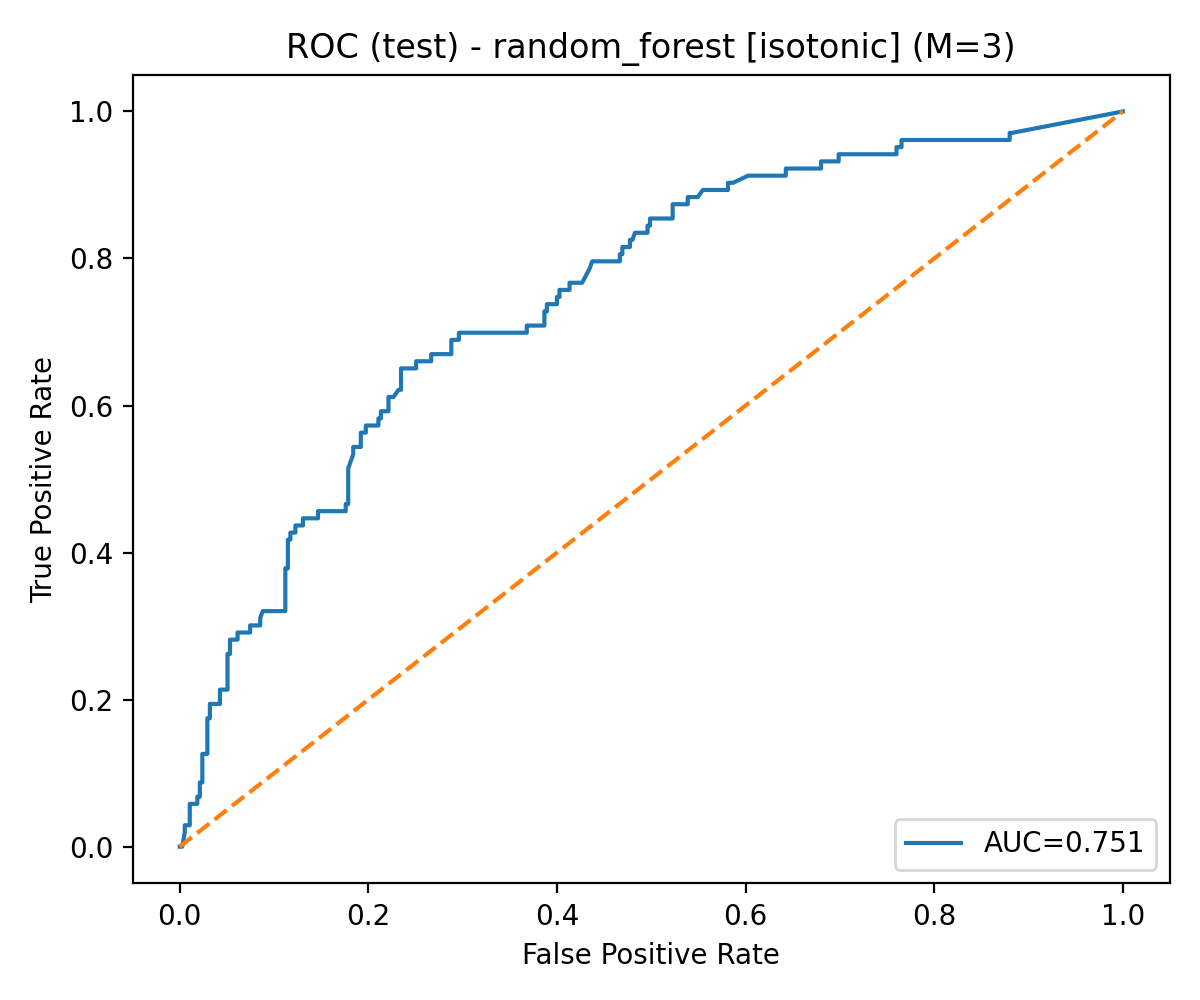

[ok] show: pr_test_random_forest_isotonic.png


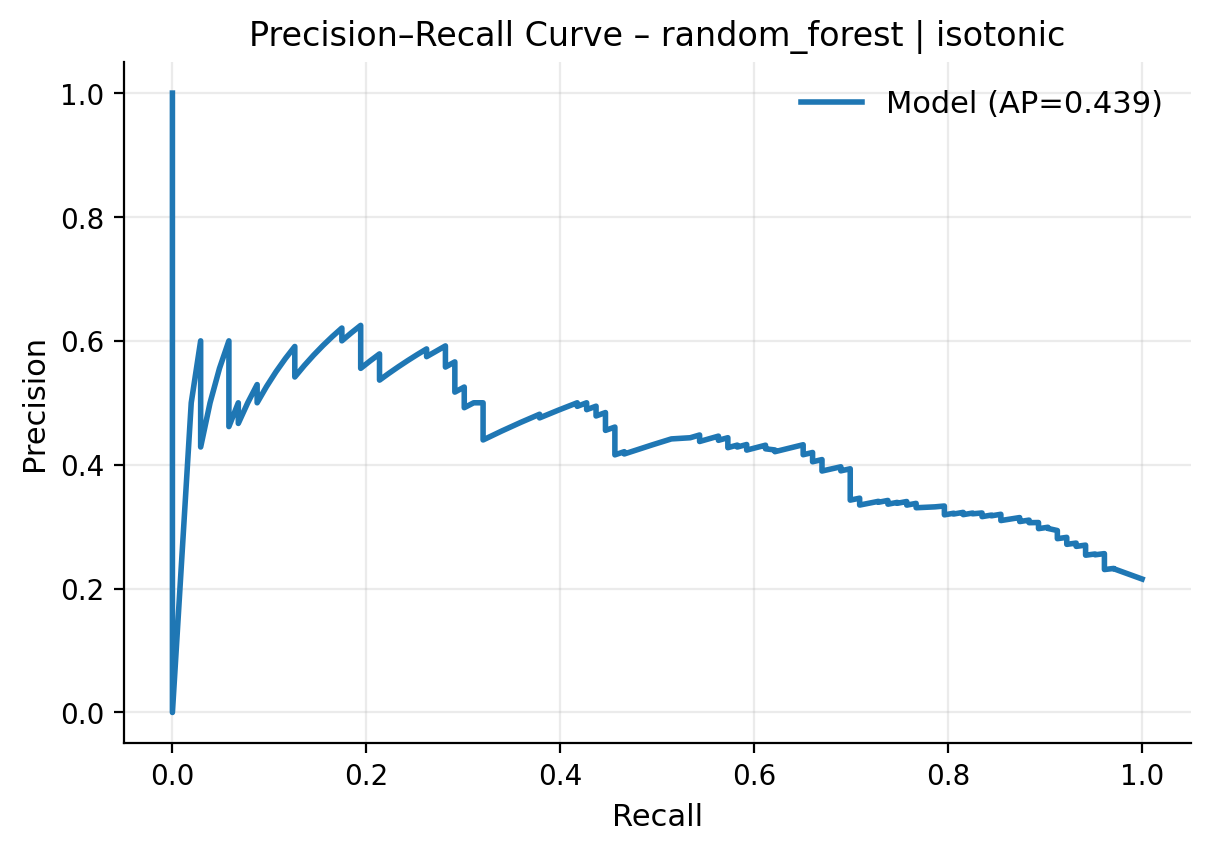

[ok] show: calibration_test_random_forest_isotonic.png


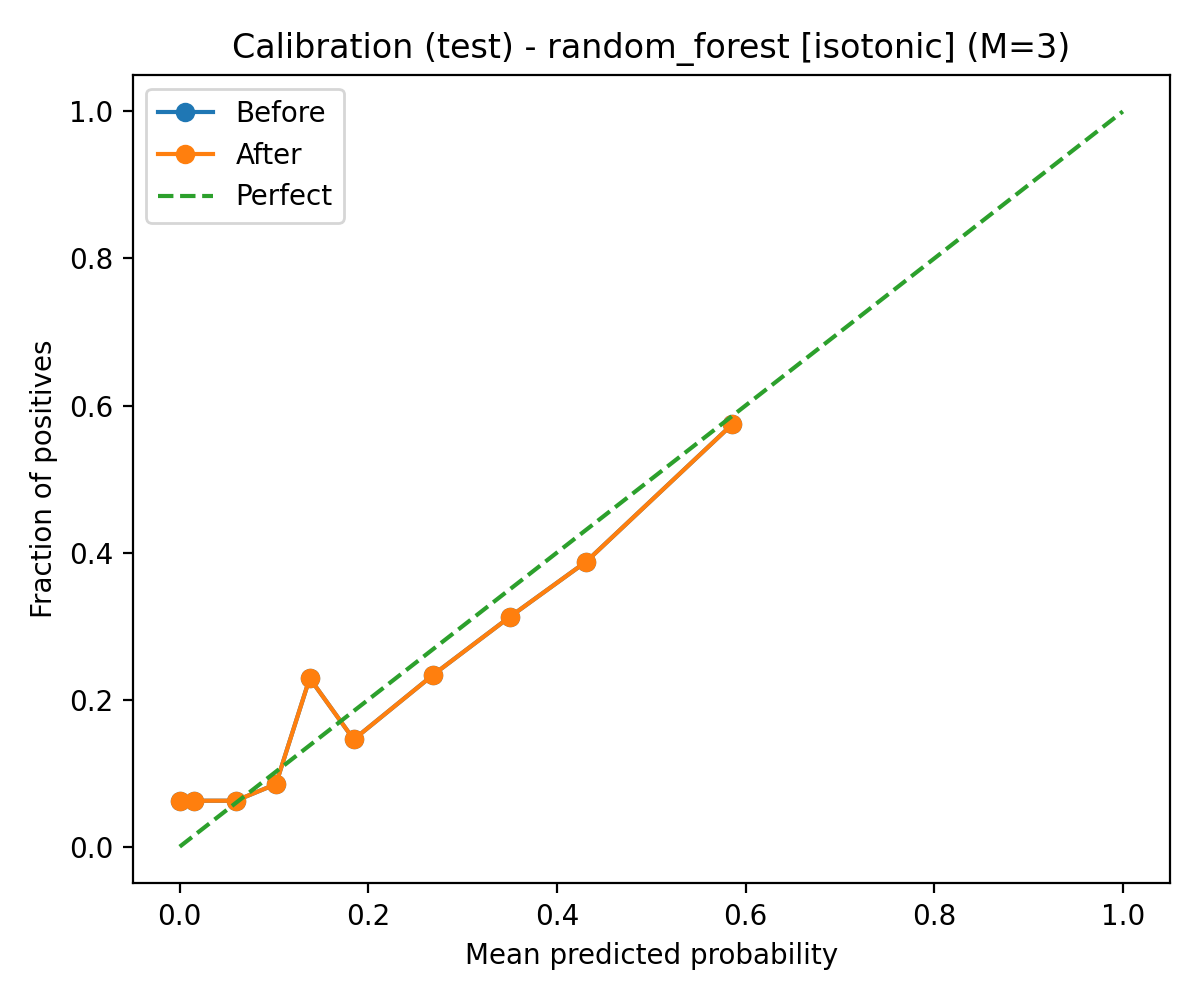

In [6]:
# %% [3. ROC/PR/Calibration 图（若存在则展示）]
from IPython.display import Image

for stem in [f"roc_test_{MODEL}{SUFFIX}", f"pr_test_{MODEL}{SUFFIX}", f"calibration_test_{MODEL}{SUFFIX}"]:
    cands = [OUT_DIR / f"{stem}.png", FIG_DIR / f"{stem}.png"]
    chosen = next((p for p in cands if p.exists()), None)
    if chosen is not None:
        print(f"[ok] show: {chosen.name}")
        display(Image(filename=str(chosen)))
    else:
        warnings.warn(f"未找到图：{stem}.png（在 outputs/ 或 outputs/figures/）")

[ok] threshold summary


,grid_min,grid_max,step,n,prevalence,youden_thr,f1_thr,sens_targets,spec_targets
0,0.01,0.99,0.001,981,0.215481,0.292743,0.292,"[[0.9, 0.01]]","[[0.8, 0.33299999999999974]]"


[ok] threshold grid: (981, 12)


,thr,sensitivity,specificity,precision,npv,accuracy,f1,brier,tp,fp,tn,fn
0,0.010,0.961165,0.141333,0.235154,0.929825,0.317992,0.377863,0.14716,99,322,53,4
1,0.011,0.961165,0.157333,0.238554,0.936508,0.330544,0.382239,0.14716,99,316,59,4
2,0.012,0.961165,0.157333,0.238554,0.936508,0.330544,0.382239,0.14716,99,316,59,4
3,0.013,0.961165,0.157333,0.238554,0.936508,0.330544,0.382239,0.14716,99,316,59,4
4,0.014,0.961165,0.157333,0.238554,0.936508,0.330544,0.382239,0.14716,99,316,59,4


[ok] show: thr_metrics_random_forest_isotonic.png


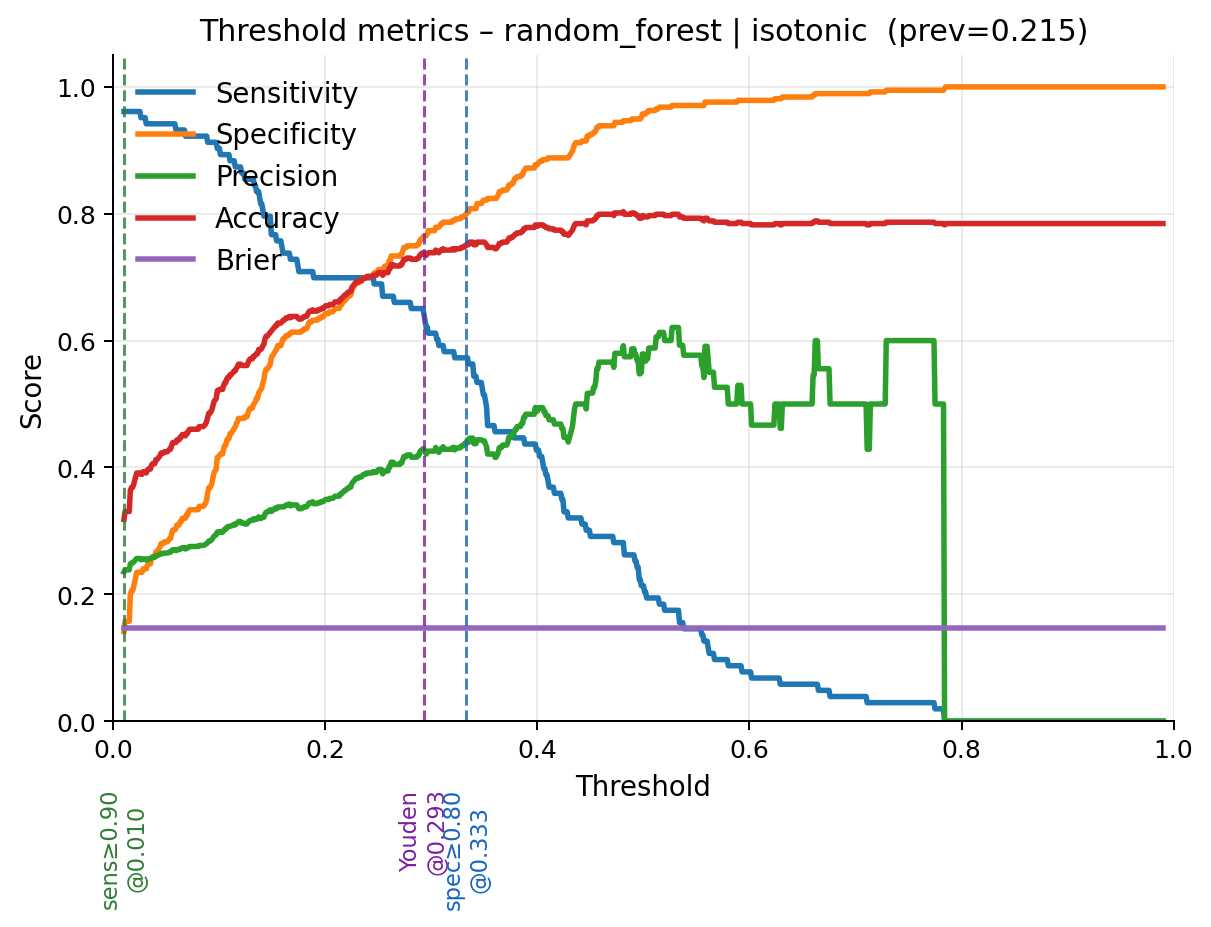

[ok] show: thr_fscore_random_forest_isotonic.png


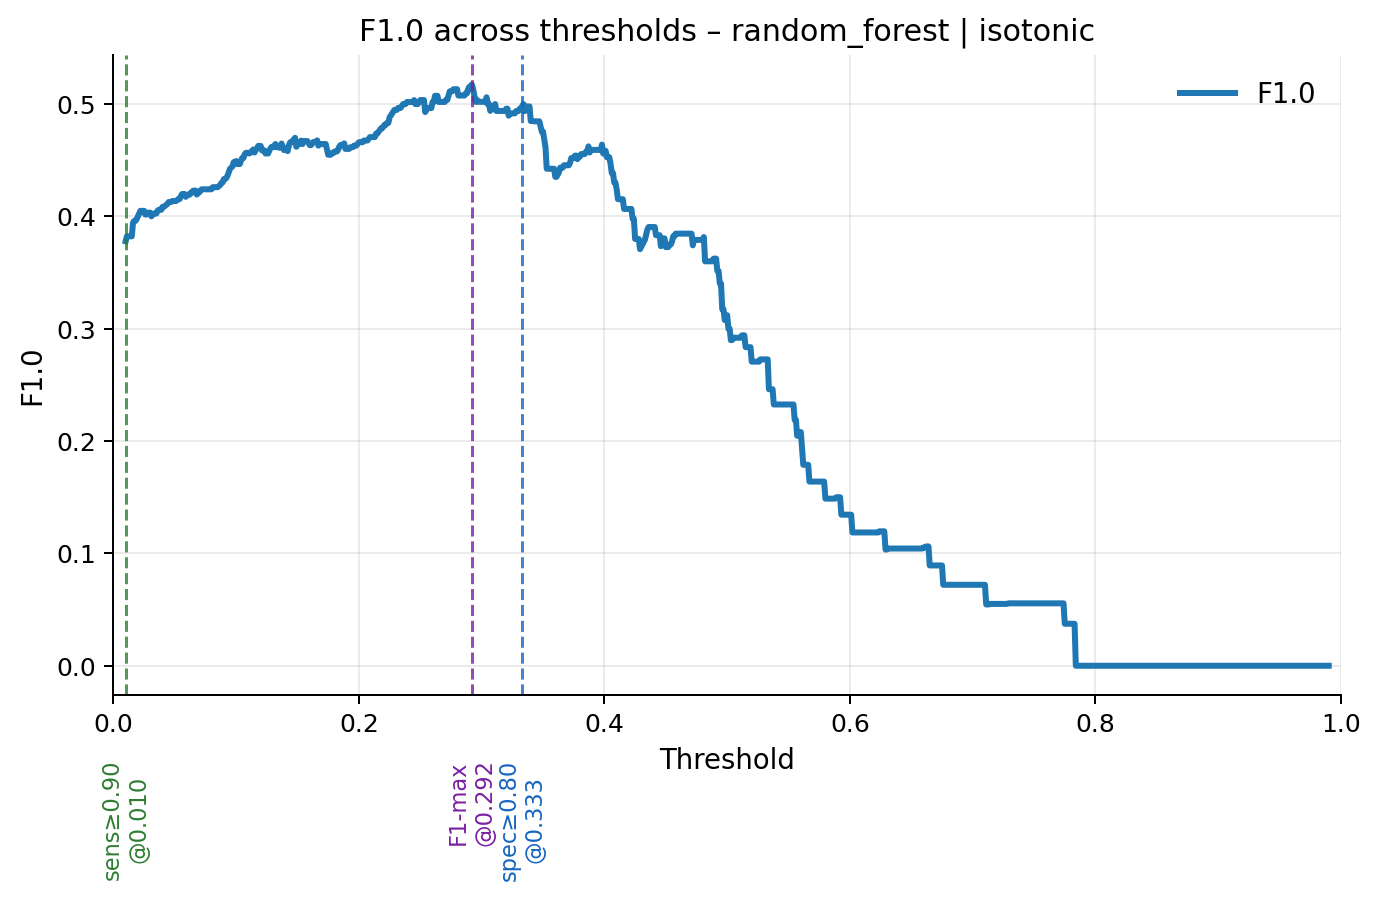

In [7]:
# %% [4. 阈值扫描摘要 & 曲线]
# 兼容新版 threshold_scan 的命名： *_summary.json / thr_*.png
cand_json = list(OUT_DIR.glob(f"threshold_scan_{MODEL}{SUFFIX}_summary.json"))
cand_csv  = list(OUT_DIR.glob(f"threshold_scan_{MODEL}{SUFFIX}.csv"))
p_thrj = sorted(cand_json)[-1] if cand_json else None
p_thrc = sorted(cand_csv)[-1] if cand_csv else None

if p_thrj and p_thrj.exists():
    js = json.loads(p_thrj.read_text(encoding="utf-8"))
    print("[ok] threshold summary")
    display(pd.DataFrame([js]))
else:
    warnings.warn("未找到 threshold summary json")

if p_thrc and p_thrc.exists():
    thr_df = pd.read_csv(p_thrc)
    print(f"[ok] threshold grid: {thr_df.shape}")
    display(thr_df.head())
else:
    warnings.warn("未找到 threshold scan csv")

for pat in [f"thr_metrics_{MODEL}{SUFFIX}.png", f"thr_fscore_{MODEL}{SUFFIX}.png"]:
    cands = [OUT_DIR / pat, FIG_DIR / pat]
    chosen = next((p for p in cands if p.exists()), None)
    if chosen is not None:
        print(f"[ok] show: {chosen.name}")
        display(Image(filename=str(chosen)))
    else:
        warnings.warn(f"未找到图：{pat}")

[ok] subgroup metrics


,subgroup,n,prevalence,auc,auc_lo,auc_hi,sensitivity,specificity,precision,npv,accuracy,f1,brier,tp,fp,tn,fn
0,Overall,478,0.215481,0.750511,NaN,NaN,0.650485,0.762667,0.429487,0.888199,0.738494,0.517375,0.147160,67.0,89.0,286.0,36.0
1,Age <50,478,0.215481,0.750511,0.697902,0.801734,0.650485,0.762667,0.429487,0.888199,0.738494,0.517375,0.147160,67.0,89.0,286.0,36.0
2,Age 50-64,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,Age 65-79,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,Age ≥80,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
5,Comorb: myocardial_infarct,95,0.221053,0.680180,0.538925,0.824683,0.476190,0.716216,0.322581,0.828125,0.663158,0.384615,0.160278,10.0,21.0,53.0,11.0
6,Comorb: heart_failure,155,0.238710,0.715873,0.607198,0.813116,0.621622,0.669492,0.370968,0.849462,0.658065,0.464646,0.166138,23.0,39.0,79.0,14.0
7,Comorb: peripheral_vascular,36,0.333333,0.732639,0.549978,0.898444,0.750000,0.625000,0.500000,0.833333,0.666667,0.600000,0.197246,9.0,9.0,15.0,3.0
8,Comorb: dementia,14,0.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Comorb: cerebrovascular_disease,65,0.215385,0.862045,0.702644,0.970590,0.714286,0.921569,0.714286,0.921569,0.876923,0.714286,0.113772,10.0,4.0,47.0,4.0


[ok] subgroup forest


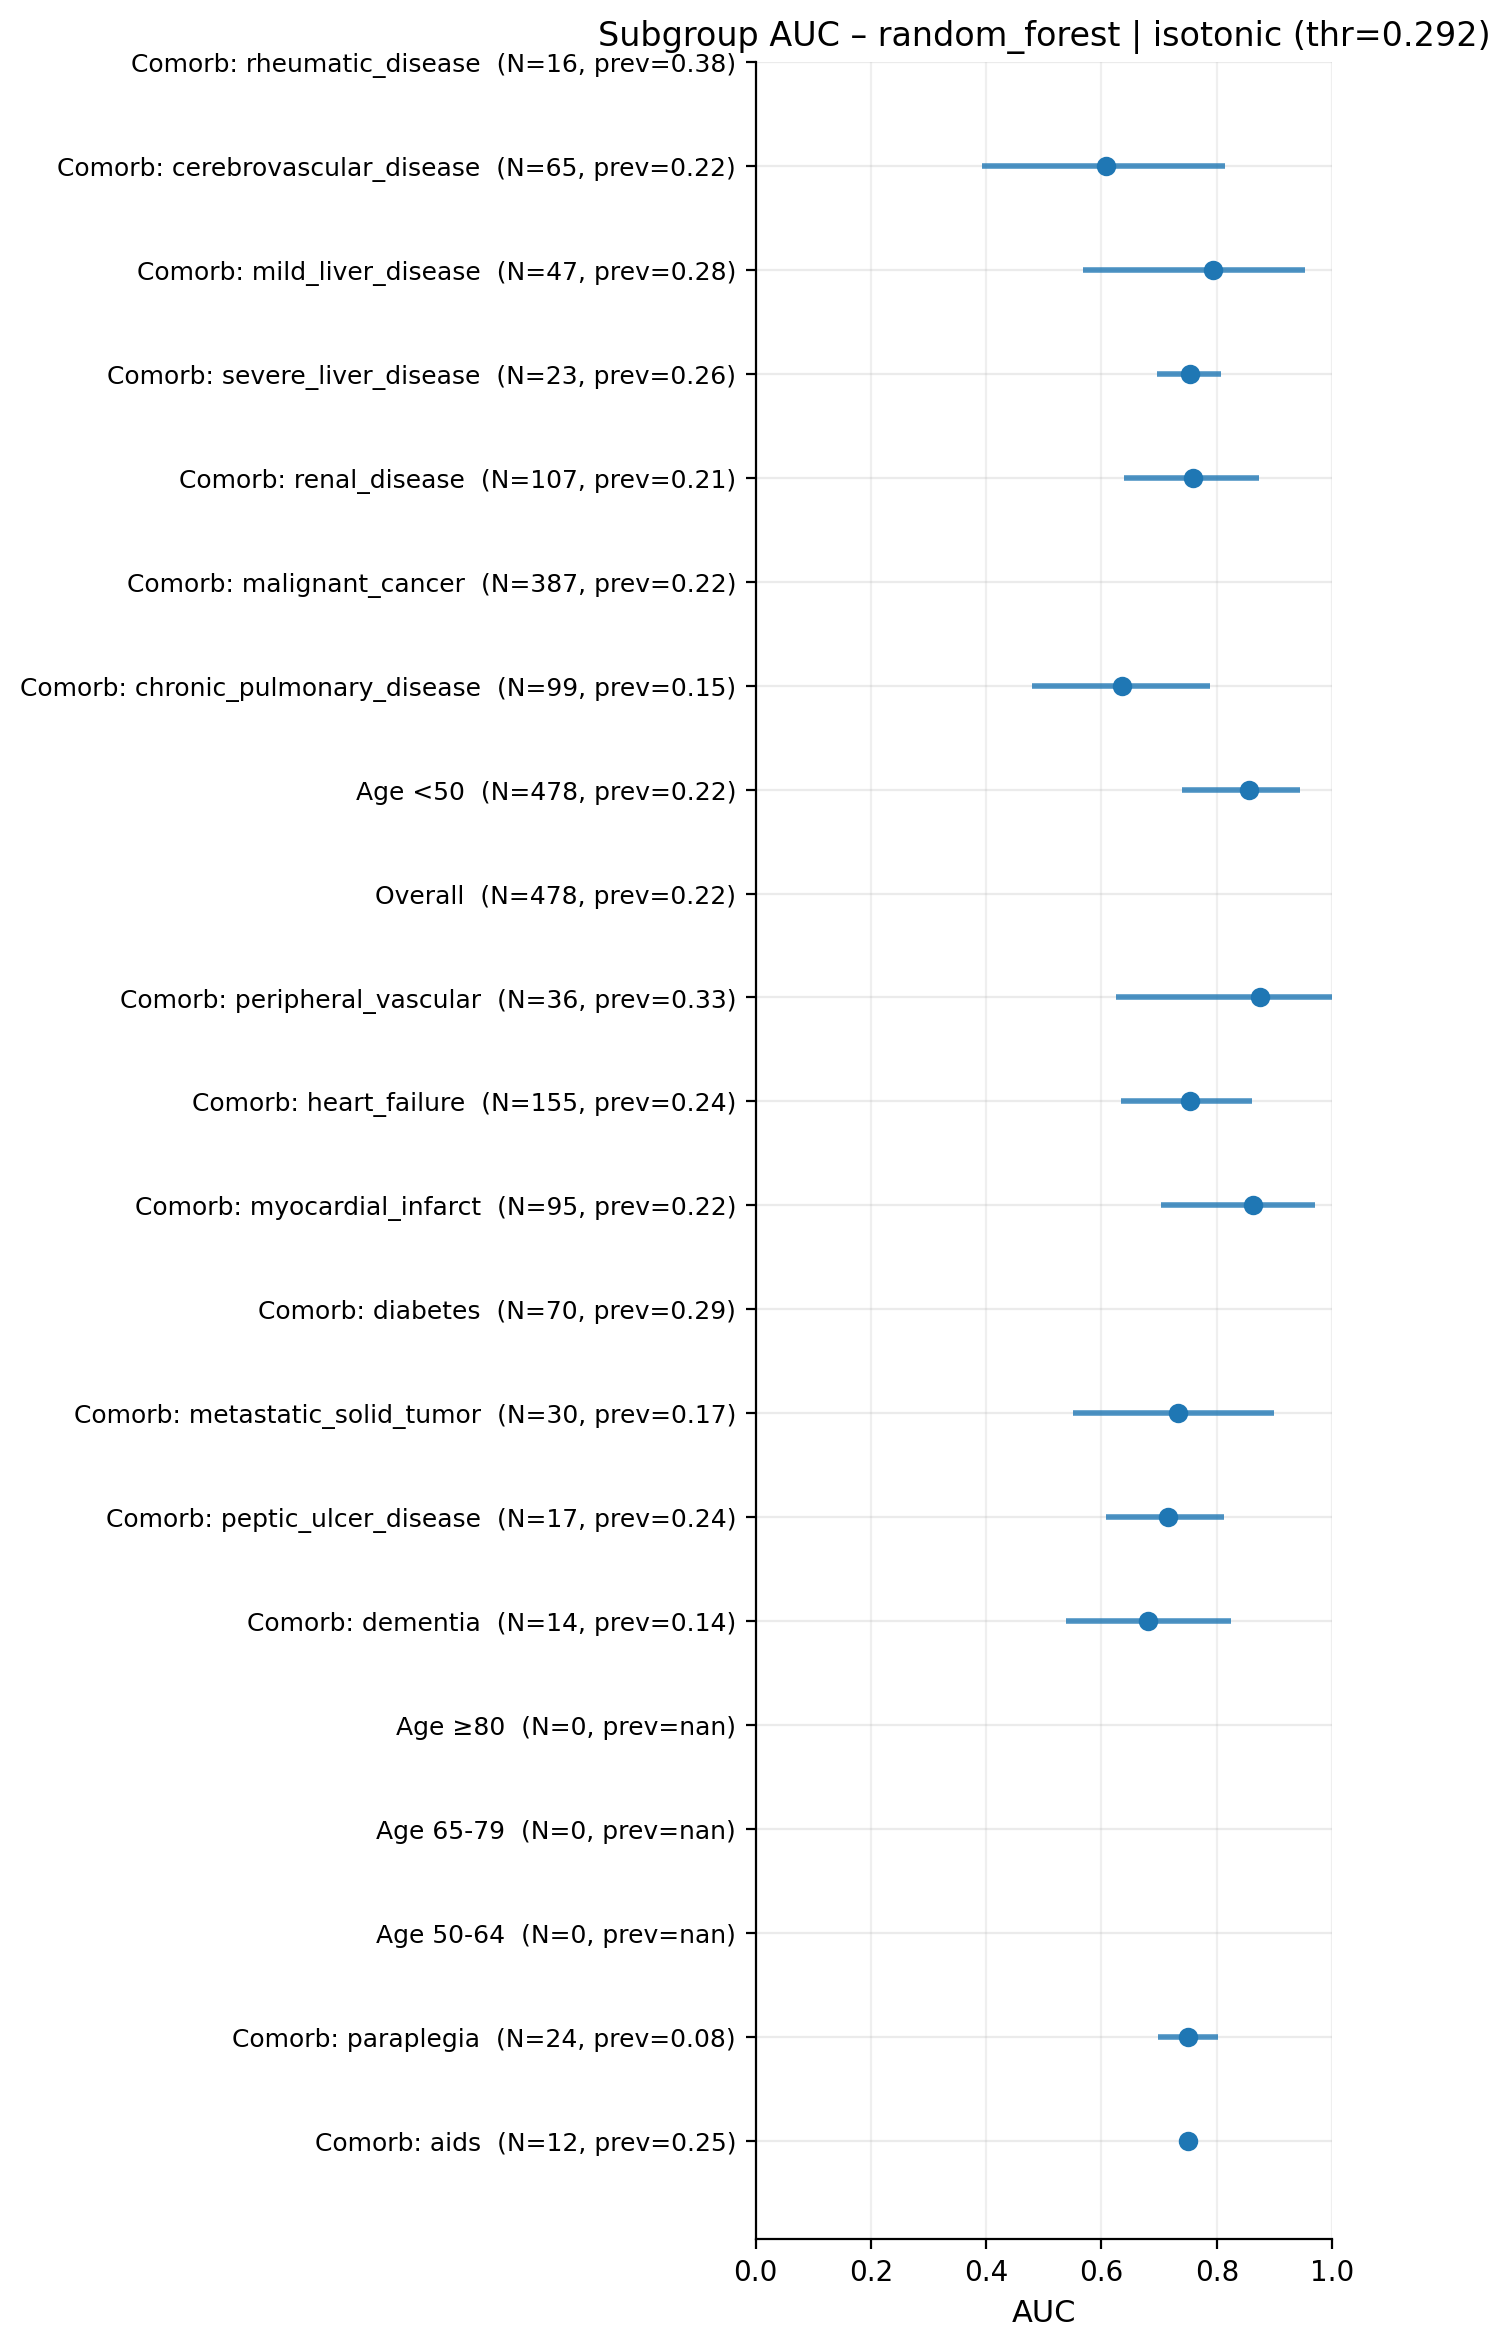

In [11]:
# %% [5. Subgroup 分层森林图（如存在）]
p_sub_csv = TAB_DIR / f"subgroup_metrics_{MODEL}{SUFFIX}.csv"
p_sub_fig = (PROJECT_ROOT / "outputs" / "figures" / f"subgroup_forest_{MODEL}{SUFFIX}.png")
if p_sub_csv.exists():
    print("[ok] subgroup metrics")
    display(pd.read_csv(p_sub_csv).head(20))
else:
    warnings.warn(f"未找到 {p_sub_csv}")

if p_sub_fig.exists():
    print("[ok] subgroup forest")
    from IPython.display import Image
    display(Image(filename=str(p_sub_fig)))
else:
    warnings.warn(f"未找到 {p_sub_fig}")

[ok] SHAP importance (csv)


,feature,mean_abs_shap
0,pt,0.066987
1,bun,0.065005
2,platelets,0.045416
3,heart_rate,0.043894
4,sbp,0.042267
5,bicarbonate,0.030088
6,spo2,0.026133
7,hemoglobin,0.020039


[ok] show: shap_importance_bar_random_forest.png


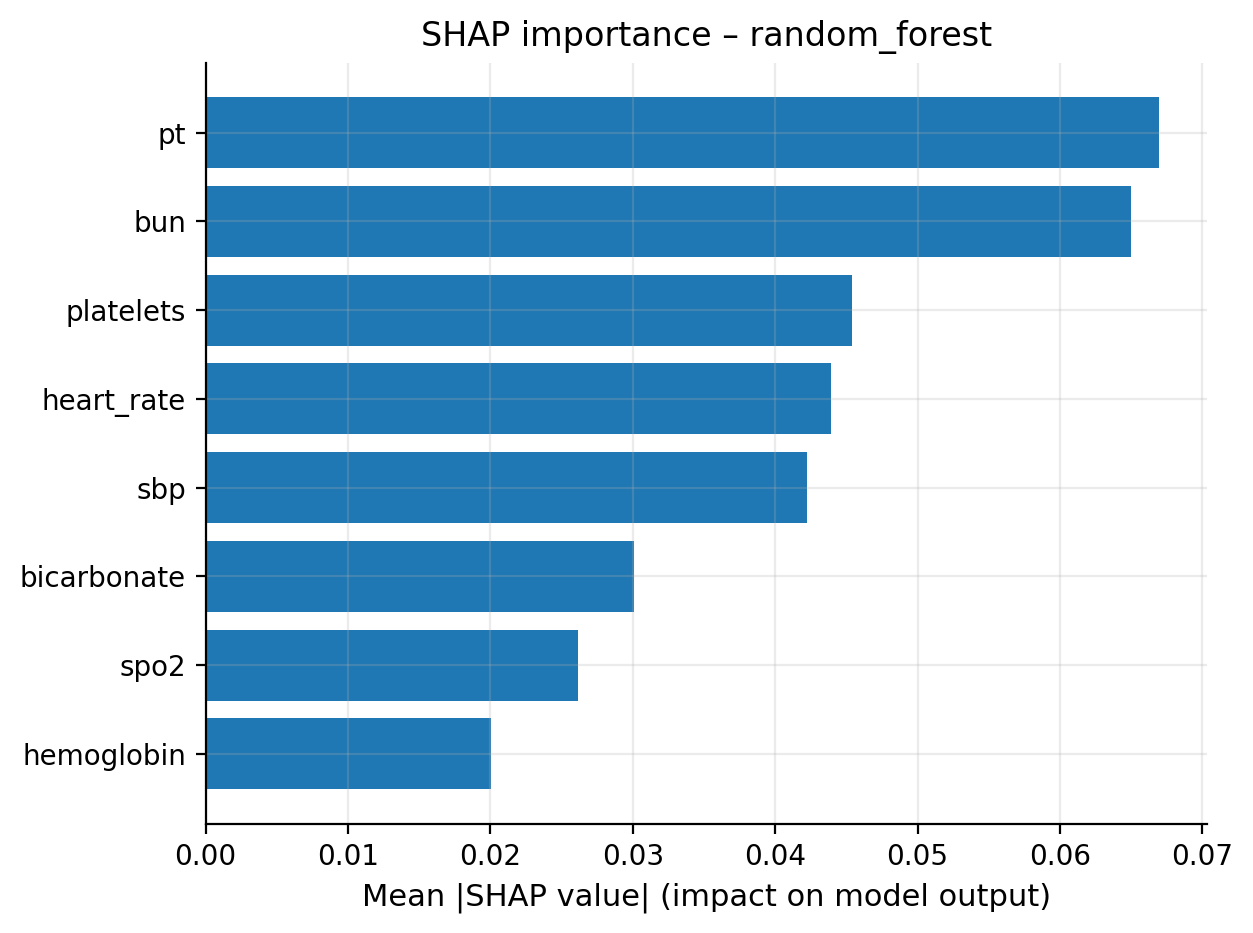

[ok] show: shap_summary_random_forest.png


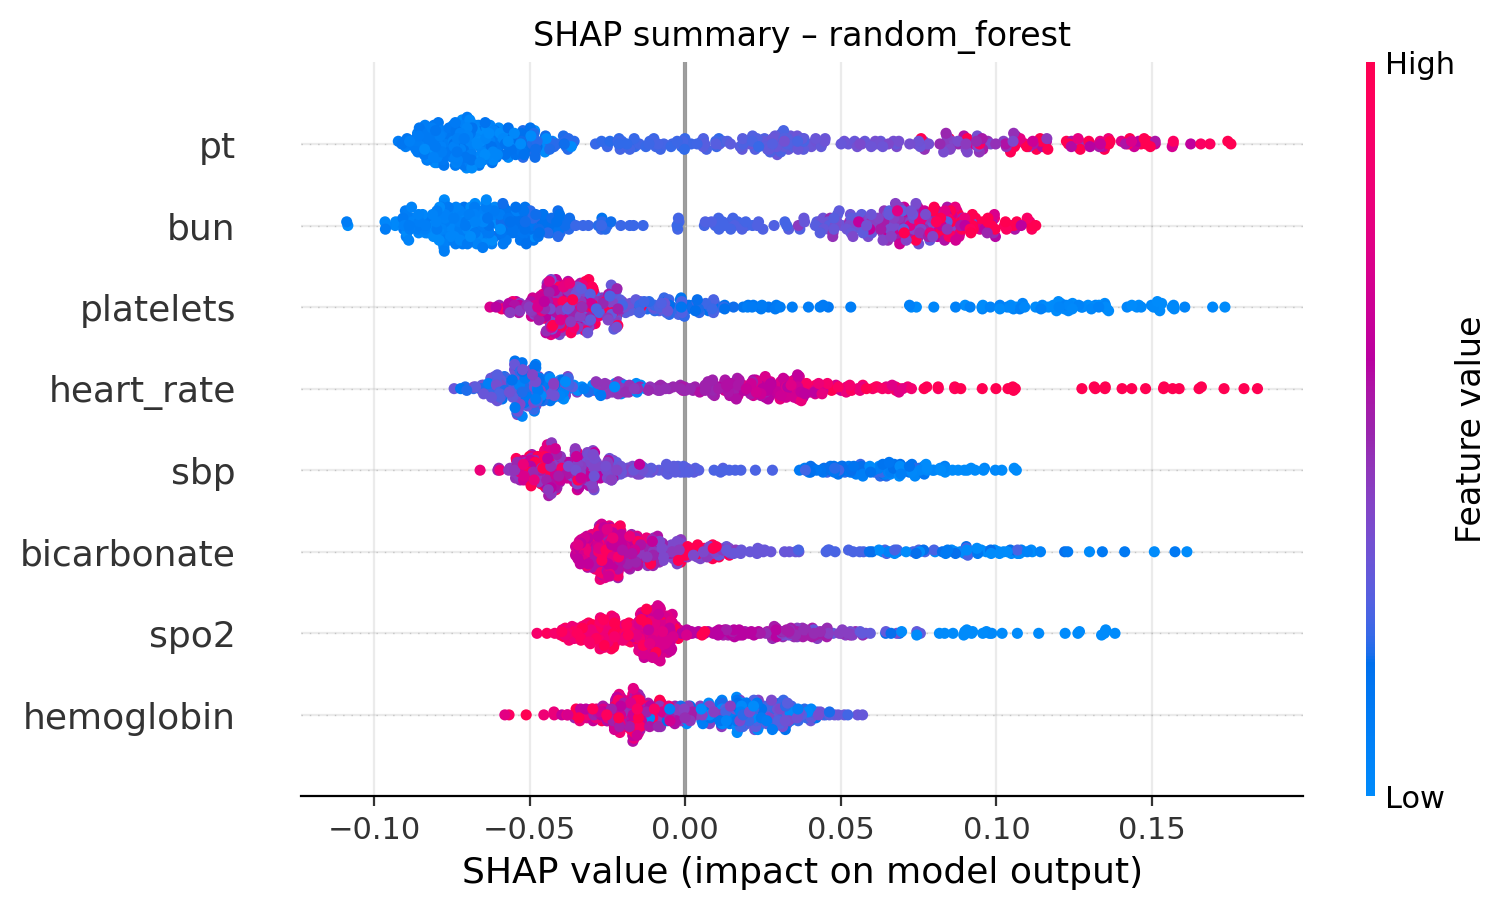

In [9]:
# %% [6. SHAP 重要性（如存在）]
P_SHAP_CSV = PROJECT_ROOT / "outputs" / "shap" / f"shap_importance_{MODEL}.csv"
P_SHAP_BAR = PROJECT_ROOT / "outputs" / "shap" / f"shap_importance_bar_{MODEL}.png"
P_SHAP_SUM = PROJECT_ROOT / "outputs" / "shap" / f"shap_summary_{MODEL}.png"

if P_SHAP_CSV.exists():
    print("[ok] SHAP importance (csv)")
    display(pd.read_csv(P_SHAP_CSV))
else:
    warnings.warn(f"缺少 {P_SHAP_CSV}")

for p in [P_SHAP_BAR, P_SHAP_SUM]:
    if p.exists():
        print(f"[ok] show: {p.name}")
        from IPython.display import Image
        display(Image(filename=str(p)))
    else:
        warnings.warn(f"缺少 {p}")

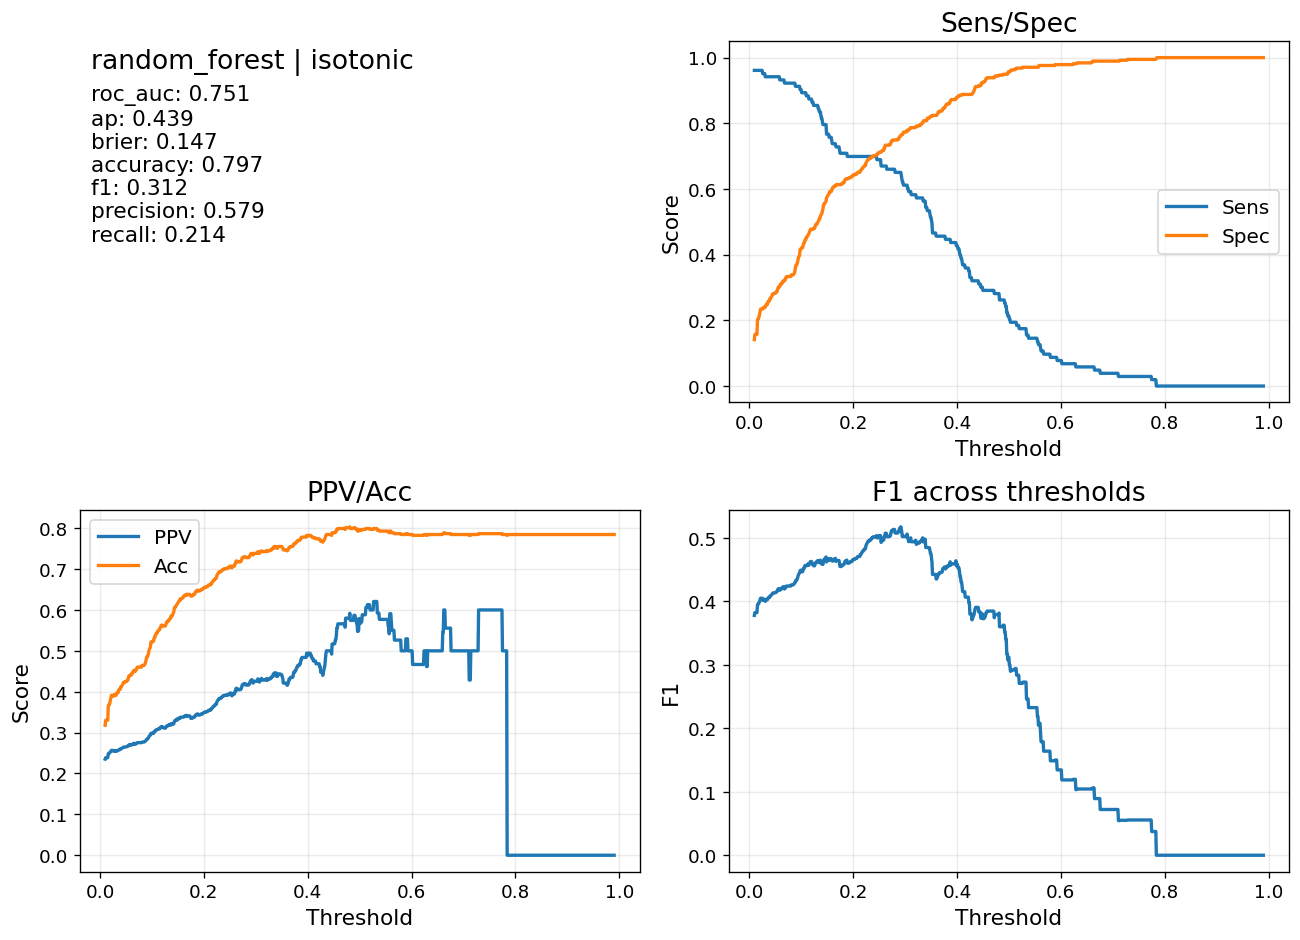

In [13]:
# %% [7. 汇总看板（可选）：把核心指标画到一页]
from pathlib import Path
import warnings
import pandas as pd
import matplotlib.pyplot as plt

def safe_read_csv(path: Path):
    try:
        if path is not None and Path(path).exists():
            return pd.read_csv(path)
    except Exception:
        pass
    return None

def first_available(*paths: Path):
    """按顺序返回第一个存在且非空的 DataFrame；都不可用则返回 None。"""
    for p in paths:
        df = safe_read_csv(p)
        if df is not None and not df.empty:
            return df
    return None

# 允许 metrics 有两个候选（新旧路径）
df_model = first_available(p_metrics_model_alt, p_metrics_model)
# threshold 扫描通常只有一个路径变量
df_thr   = first_available(p_thrc)

if df_model is not None and df_thr is not None and not df_thr.empty:
    fig, axes = plt.subplots(2, 2, figsize=(11, 8))
    ax1, ax2, ax3, ax4 = axes.ravel()

    # AUC/AP/Brier 等信息角注
    txt_lines = []
    for k in ["roc_auc", "ap", "brier", "accuracy", "f1", "precision", "recall"]:
        if k in df_model.columns:
            try:
                txt_lines.append(f"{k}: {float(df_model.iloc[0][k]):.3f}")
            except Exception:
                pass

    ax1.axis("off")
    ax1.text(0.02, 0.98, f"{MODEL} | {METHOD}", va="top", ha="left", fontsize=16)
    ax1.text(0.02, 0.88, "\n".join(txt_lines) if txt_lines else "No metrics found", 
             va="top", ha="left", fontsize=13)

    # Sens/Spec 曲线
    apply_mpl_style()
    if {"thr","sensitivity","specificity"}.issubset(df_thr.columns):
        ax2.plot(df_thr["thr"], df_thr["sensitivity"], label="Sens", lw=2)
        ax2.plot(df_thr["thr"], df_thr["specificity"], label="Spec", lw=2)
        ax2.set_title("Sens/Spec")
        ax2.legend()
    ax2.set_xlabel("Threshold"); ax2.set_ylabel("Score")

    # Precision/Accuracy
    if {"thr","precision","accuracy"}.issubset(df_thr.columns):
        ax3.plot(df_thr["thr"], df_thr["precision"], label="PPV", lw=2)
        ax3.plot(df_thr["thr"], df_thr["accuracy"], label="Acc", lw=2)
        ax3.set_title("PPV/Acc")
        ax3.legend()
    ax3.set_xlabel("Threshold"); ax3.set_ylabel("Score")

    # F1
    if {"thr","f1"}.issubset(df_thr.columns):
        ax4.plot(df_thr["thr"], df_thr["f1"], lw=2)
        ax4.set_title("F1 across thresholds")
    ax4.set_xlabel("Threshold"); ax4.set_ylabel("F1")

    plt.tight_layout()
    plt.show()
else:
    warnings.warn("汇总看板跳过（缺少 metrics 或 threshold 扫描表，或表为空）")


In [14]:
# %% [8. 复现提示（便于他人一键得到所有素材）]
print(r"""
[how-to reproduce key artifacts]

1) 训练与评估（原始概率）：
   python -m src.train --config conf/config.yaml --model random_forest
   python -m src.evaluate --config conf/config.yaml --model random_forest

2) 概率校准与评估：
   python -m src.calibrate --config conf/config.yaml --model random_forest --method isotonic
   python -m src.evaluate  --config conf/config.yaml --model random_forest --method isotonic

3) 阈值扫描与图：
   python -m src.threshold_scan --config conf/config.yaml --model random_forest --method isotonic --sens_targets 0.9 --spec_targets 0.8

4) SHAP：
   python -m src.shap_run --config conf/config.yaml --model random_forest --max_n 1000 --batch_size 256

5) 亚组评估：
   python -m src.subgroup_eval --config conf/config.yaml --model random_forest --method isotonic
""")


[how-to reproduce key artifacts]

1) 训练与评估（原始概率）：
   python -m src.train --config conf/config.yaml --model random_forest
   python -m src.evaluate --config conf/config.yaml --model random_forest

2) 概率校准与评估：
   python -m src.calibrate --config conf/config.yaml --model random_forest --method isotonic
   python -m src.evaluate  --config conf/config.yaml --model random_forest --method isotonic

3) 阈值扫描与图：
   python -m src.threshold_scan --config conf/config.yaml --model random_forest --method isotonic --sens_targets 0.9 --spec_targets 0.8

4) SHAP：
   python -m src.shap_run --config conf/config.yaml --model random_forest --max_n 1000 --batch_size 256

5) 亚组评估：
   python -m src.subgroup_eval --config conf/config.yaml --model random_forest --method isotonic

